## Session 9

### Pandas Api On Spark
Pandas is a fast and powerful open-source data analysis and manipulation framework written in Python. Apache Spark is an open-source unified analytics engine for distributed large-scale data processing. Both are widely adopted in the data engineering and data science communities.


Pandas API on Apache Spark (PySpark) enables data scientists and data engineers to run their existing pandas code on Spark.
 #### What is Pandas?
- To work with tabular data, such as data stored in spreadsheets or databases. 
- To explore, clean, and process your data. 
- Easy-to-use data structures and Data analysis tools for the Python programming language.

#### What is Pandas Api on Spark?
- Pandas doesnot scale up big data.To fill this gap Pandas Api on Spark comes in frame.
- Pandas Api on spark is effective to analyze data on Pandas as well as Pyspark.
- Also, it performs difficults tasks which are not possible in PYspark.
- Running pandas operations 10 x faster for big data sets.

#### What is the Challenge of using PySpark?
- To rewrite your code to use PySpark DataFrame,if you will know Pandas and your application is using Pandas.
- Avoids learning a new framework
- More productive
- Maintain single codebase
- Time-consuming to rewrite & testing
- Confusion between pandas vs Spark API
- Finally Error prone
- Using Pandas API on Apache Spark solves this problem.

#### History of Pandas API on Spark:
 - Prior to Spark version 3.2 release to work on Pandas need to download Koalas project.
 - Koalas is an open source project announced in Spark + AI Summit 2019 (Apr 24, 2019) that enables running pandas dataframe operations on PySpark.
 - Spark version 3.2 release has built in Koalas project which enable Pandas API on Spark. 


#### Requirements:
- Spark Version 3.2 release and greater
  - import pyspark.pandas as ps
- Spark Versions older than release 3.2 need to install Koalas
  - pip install koalas

#### Imports:

In [4]:
import pandas as pd
import numpy as np
import pyspark.pandas as ps
from pyspark.sql import SparkSession
from pyspark import SparkContext,SparkConf
import time

In [5]:
#conf=SparkConf()
#sc=SparkContext(conf=conf)

# Stop default sc
#sc.stop()
# Create sparkContext object
## Create Spark Session
spark = SparkSession \
    .builder \
    .master("spark://Kirtis-MBP.attlocal.net:7077") \
    .appName("Spark_Pandas_Api") \
    .config("spark.executor.memory",'2g') \
    .getOrCreate()


In [6]:
spark

#### Object Creation:

In [4]:
# Object creation with pandas 
technologies=({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python","NA"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'Duration':['30days','50days','55days','40days','60days','35days','30days','50days','40days'],
    'Discount':[1000,2300,1000,1200,2500,None,1400,1600,0]
          })
df=pd.DataFrame(technologies)
df

Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0

In [7]:
#Creating spark dataframe from pandas dataframe
sp_df=spark.createDataFrame(df)
sp_df.show()

+-------+-----+--------+--------+
|Courses|  Fee|Duration|Discount|
+-------+-----+--------+--------+
|  Spark|22000|  30days|  1000.0|
|PySpark|25000|  50days|  2300.0|
| Hadoop|23000|  55days|  1000.0|
| Python|24000|  40days|  1200.0|
| Pandas|26000|  60days|  2500.0|
| Hadoop|25000|  35days|     NaN|
|  Spark|25000|  30days|  1400.0|
| Python|22000|  50days|  1600.0|
|     NA| 1500|  40days|     0.0|
+-------+-----+--------+--------+



In [8]:
#Object creation Pandas API DataFrame on PySpark
dfs=ps.DataFrame(technologies)
dfs

Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0

In [ ]:
dfs.show()

In [ ]:
#Creating a pandas-on-Spark Series by passing a list of values, 
#letting pandas API on Spark create a default integer index:
s = ps.Series([1, 3, 5, np.nan, 6, 8])
s

In [ ]:
sp = pd.Series([1, 3, 5, np.nan, 6, 8])
sp

In [ ]:
#Creating a pandas-on-Spark DataFrame by passing a dict of objects that can be converted to series-like.
psdf = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])

In [ ]:
psdf

In [ ]:
pddf = pd.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]},
    index=[10, 20, 30, 40, 50, 60])
pddf

In [ ]:
# creating new column name with nan value 
pddf=pddf.reindex(columns=list(pddf.columns) + ['d'])
pddf

In [ ]:
#Updating nan value with some random values.
index=pddf.index
pddf.loc[index[0]:index[1], 'd'] = 1
pddf.loc[index[3]:index[4], 'd'] = 2

In [ ]:
pddf

In [ ]:
psdf1 = ps.DataFrame(
    {'a': [1, 2, 3, 4, 5, 6],
     'b': [100, 200, 300, 400, 500, 600],
     'c': ["one", "two", "three", "four", "five", "six"]})
psdf1

In [ ]:
#Creating a pandas DataFrame by passing a numpy array, with a datetime index and labeled columns:
dates = pd.date_range('20230101', periods=6)

In [ ]:
dates

In [ ]:
dateps=ps.date_range('20130201',periods=6)

In [ ]:
dateps

In [ ]:
pdf = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list('ABCD'))

In [ ]:
pdf

In [ ]:
# Creating a Spark DataFrame from pandas DataFrame
dfs=spark.createDataFrame(pdf)
dfs.show()

In [ ]:
#Creating pandas-on-Spark DataFrame from Spark DataFrame.
pdfs=dfs.toPandas()
pdfs

In [ ]:
pdfs.dtypes

In [ ]:
# displays statistical summary of data
pdfs.describe()

In [ ]:
pdfs.head()

In [ ]:
#To show index
pdfs.index

In [ ]:
# To get column names
pdfs.columns

In [ ]:
#Converting spark dataframe to pandas Api.Data is cached in mappartition Rdd.
pdfs1=dfs.pandas_api()
pdfs1

In [ ]:
#Underlying numpy data.Spark stores data in cache with on disk option
pdfs1.to_numpy()

In [ ]:
pdfs1.T

In [ ]:
pdfs1.sort_index(ascending=False)

In [ ]:
pdfs1.sort_values(by='C')

#### Missing Data
- Pandas API on Spark primarily uses the value **np.nan** to represent missing data. It is by default not included in computations.

In [ ]:
pdf1 = pdf.reindex(index=dates[0:4], columns=list(pdf.columns) + ['E'])

In [ ]:
pdf1.loc[dates[0]:dates[1], 'E'] = 1
psdf1 = ps.from_pandas(pdf1)

In [ ]:
psdf1

In [ ]:
#To drop any rows that have missing data."dropna(how='any')""
psdf1.dropna(how='any')

In [ ]:
#Filling missing data with "fillna(value='')" method
psdf1.fillna(value=4)

#### Operations:
##### Stats: Operations in general exclude missing data.

In [ ]:
psdf1.mean()

In [ ]:
psdf1.mean(1)

In [ ]:
psdf1.B

In [ ]:
psdf1.count()

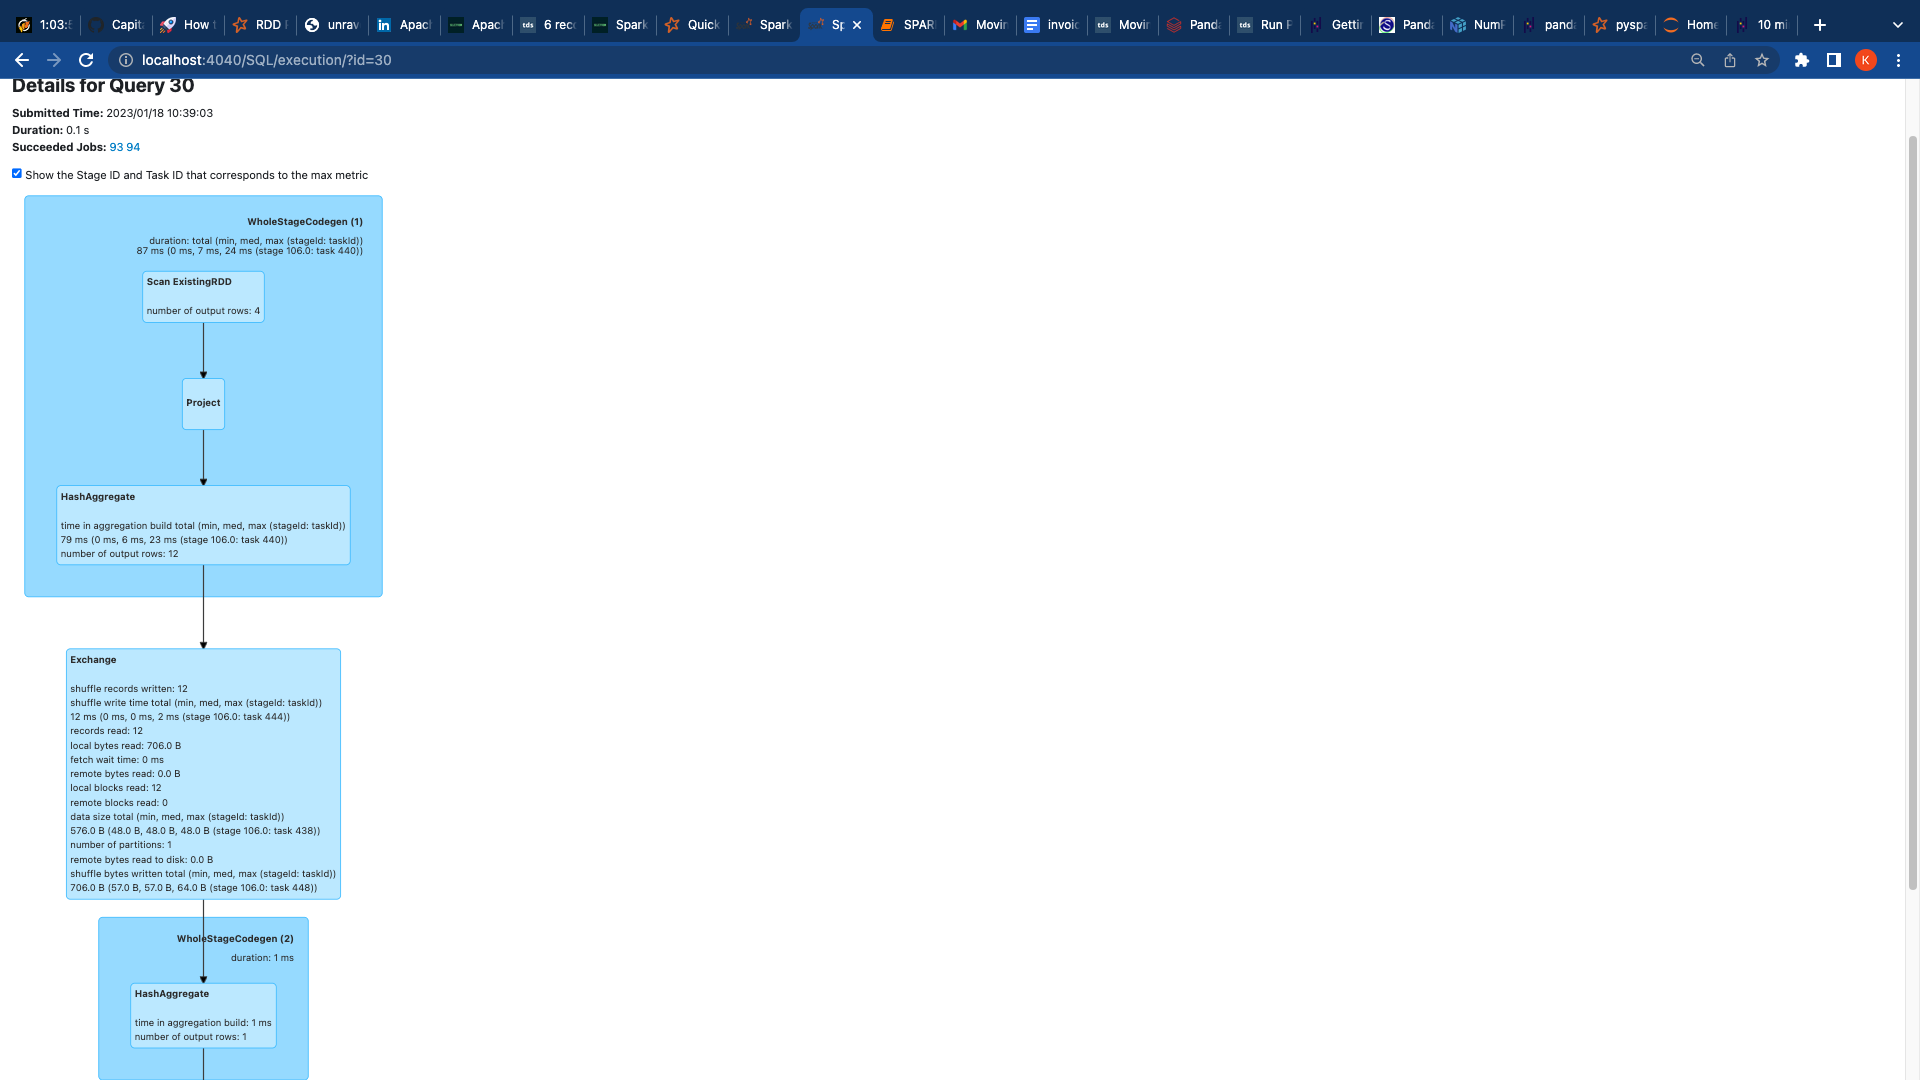

#### Apply: DataFrame.apply() applies a user defined function to the data:

In [ ]:
psdf1.apply(np.cumsum)

In [ ]:
ps.options.display.max_rows

In [ ]:
psdf1.spark.explain()

In [ ]:
psdf1.apply(np.cumsum).spark.explain()

#### Spark Configurations:
Various configurations in PySpark could be applied internally in pandas API on Spark. For example, you can enable Arrow optimization to hugely speed up internal pandas conversion. See also PySpark Usage Guide for Pandas with Apache Arrow in PySpark documentation.[https://spark.apache.org/docs/3.0.1/sql-pyspark-pandas-with-arrow.html#apache-arrow-in-pyspark]

In [ ]:
prev = spark.conf.get("spark.sql.execution.arrow.pyspark.enabled") 
# Enable Arrow-based columnar data transfers
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", "true")
# Use default index prevent overhead.
ps.set_option("compute.default_index_type", "distributed")  
import warnings
# Ignore warnings coming from Arrow optimizations.
warnings.filterwarnings("ignore") 

In [ ]:
# %timeit:Measure execution time of small code snippets
%timeit ps.range(300000).to_pandas()

In [ ]:
#disable the spark arrow optimization
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", False)
%timeit ps.range(300000).to_pandas()


In [ ]:
# Reset back both the options
ps.reset_option("compute.default_index_type")
spark.conf.set("spark.sql.execution.arrow.pyspark.enabled", prev)

In [ ]:
%timeit ps.range(300000).to_pandas()

#### Options and settings:
- Pandas API on Spark has an options system that lets you customize some aspects of its behaviour, display-related options being those the user is most likely to adjust.
- Options have a full “dotted-style”, case-insensitive name (e.g. display.max_rows). You can get/set options directly as attributes of the top-level options attribute
- The API is composed of 3 relevant functions, available directly from the pandas_on_spark namespace:

    - get_option() / set_option() - get/set the value of a single option.

    - reset_option() - reset one or more options to their default value.
-  get_option() and set_option() are available from the pandas_on_spark namespace. To change an option, call set_option('option name', new_value).
- All options also have a default value, and you can use reset_option to do just that

In [ ]:
ps.options.compute.max_rows

In [ ]:
#To change default value of option 
ps.options.display.max_rows = 10

In [ ]:
ps.options.display.max_rows

In [ ]:
# changing the option value using set_option()
ps.set_option('display.max_rows',100)
ps.get_option('display.max_rows')

In [ ]:
ps.options.display.max_rows

In [ ]:
# Reseting back to default value by using reset_option()
ps.reset_option("display.max_rows")

In [ ]:
ps.options.display.max_rows

In [ ]:
# Change default index type
ps.options.compute.default_index_type

In [ ]:
ps.options.compute.eager_check

In [ ]:
ps.options.compute.isin_limit

In [ ]:
#Used to enable operations on dataframes/series
ps.options.compute.ops_on_diff_frames

In [ ]:
ps.options.compute.ordered_head

In [ ]:
ps.options.compute.shortcut_limit

In [ ]:
ps.options.display.max_rows

In [ ]:
ps.options.plotting.backend

In [ ]:
ps.options.plotting.max_rows

In [ ]:
ps.option_context

##### option_context context manager has been exposed through the top-level API, allowing you to execute code with given option values. Option values are restored automatically when you exit the with block:

In [ ]:
with ps.option_context("display.max_rows", 10, "compute.max_rows", 5):
    print(ps.get_option("display.max_rows"))
    print(ps.get_option("compute.max_rows"))

In [ ]:
print(ps.get_option("display.max_rows"))
print(ps.get_option("compute.max_rows"))

#### Operations on different DataFrames
- Pandas API on Spark disallows the operations on different DataFrames (or Series) by default to prevent expensive operations. 
- It internally performs a join operation which can be expensive in general.
- This can be enabled by setting compute.ops_on_diff_frames to True to allow such cases. 

In [ ]:
psdf1 = ps.range(5)
psdf2 = ps.DataFrame({'id': [5, 4, 3]})
(psdf1 - psdf2).sort_index()

##### ValueError: Cannot combine the series or dataframe because it comes from a different dataframe. In order to allow this operation, enable 'compute.ops_on_diff_frames' option.

In [ ]:
ps.set_option("compute.ops_on_diff_frames",True)
(psdf1 - psdf2).sort_index()


In [ ]:
ps.reset_option("compute.ops_on_diff_frames")
psser_a = ps.Series([1, 2, 3, 4])
psdf2['new_col']=psser_a

In [ ]:
ps.set_option("compute.ops_on_diff_frames",True)
psdf2['new_col']=psser_a
psdf2

In [ ]:
ps.reset_option('compute.ops_on_diff_frames')

#### Default Index type
- The default index is used in several cases, for instance, when Spark DataFrame is converted into pandas-on-Spark DataFrame. In this case, internally pandas API on Spark attaches a default index into pandas-on-Spark DataFrame.
- There are several types of the default index that can be configured by compute.default_index_type as below:
  1. sequence:
     - increases one by one, by PySpark’s Window function without specifying partition. Therefore, it can end up with whole partition in single node. 
     - Avoided when the data is large. 
  2. distributed-sequence (default):
     - increases one by one, by group-by and group-map approach in a distributed manner. 
     - generates the sequential index globally.
     - If the default index must be the sequence in a large dataset, this index has to be used.
  3. distributed:
     - monotonically increasing sequence
     - indeterministic values
     - does not have any penalty comparing to other index types

In [ ]:
ps.reset_option("compute.default_index_type")
psdf2.index

In [ ]:
ps.set_option('compute.default_index_type', 'sequence')

In [ ]:
psdf2.index

In [ ]:
ps.reset_option("compute.default_index_type")

In [ ]:
ps.get_option("compute.default_index_type")

In [ ]:
ps.set_option('compute.default_index_type', 'distributed')
psdf2.index

In [ ]:
ps.set_option('compute.default_index_type', 'distributed')
psdf = ps.range(3)
ps.reset_option('compute.default_index_type')
psdf.index

In [ ]:
ps.set_option('compute.default_index_type', 'distributed')
psdf.index

In [ ]:
ps.reset_option('compute.default_index_type')

In [ ]:
ps.set_option('compute.default_index_type', 'sequence')
psdf.index

In [ ]:
from pyspark.sql import functions as F
spark_df = ps.range(3).to_spark()
spark_df.select(F.monotonically_increasing_id()) \
     .rdd.map(lambda r: r[0]).collect()

#### From/to pandas and PySpark DataFrames:
- It gives flexibility to use both spark dataframe as well as pandas dataframe to access operations of both dataframes.
- Pandas users can access the full pandas API by calling DataFrame.to_pandas(). 
- pandas-on-Spark DataFrame and pandas DataFrame are similar.
- When converting to each other, the data is transferred between multiple machines and the single client machine.
- Note that converting pandas-on-Spark DataFrame to pandas requires to collect all the data into the client machine; therefore, if possible, it is recommended to use pandas API on Spark or PySpark APIs instead.



##### Example: Create pandas Api on spark dataframe and convert into pandas dataframe and vise-versa

In [5]:
# Create pandas Api on spark dataframe 

technologies=({
    'Courses':["Spark","PySpark","Hadoop","Python","Pandas","Hadoop","Spark","Python","NA"],
    'Fee' :[22000,25000,23000,24000,26000,25000,25000,22000,1500],
    'Duration':['30days','50days','55days','40days','60days','35days','30days','50days','40days'],
    'Discount':[1000,2300,1000,1200,2500,None,1400,1600,0]
          })
psDF=ps.DataFrame(technologies)
psDF

Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0

In [6]:
# convert into pandas dataframe
paDF=psDF.to_pandas()
paDF

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0

In [7]:
paDF.dtypes

Courses      object
Fee           int64
Duration     object
Discount    float64
dtype: object

In [8]:
paDF.values

array([['Spark', 22000, '30days', 1000.0],
       ['PySpark', 25000, '50days', 2300.0],
       ['Hadoop', 23000, '55days', 1000.0],
       ['Python', 24000, '40days', 1200.0],
       ['Pandas', 26000, '60days', 2500.0],
       ['Hadoop', 25000, '35days', nan],
       ['Spark', 25000, '30days', 1400.0],
       ['Python', 22000, '50days', 1600.0],
       ['NA', 1500, '40days', 0.0]], dtype=object)

In [9]:
#pandas DataFrame can be a pandas-on-Spark DataFrame 
posDF=ps.from_pandas(paDF)
posDF

Courses    Fee Duration  Discount
0    Spark  22000   30days    1000.0
1  PySpark  25000   50days    2300.0
2   Hadoop  23000   55days    1000.0
3   Python  24000   40days    1200.0
4   Pandas  26000   60days    2500.0
5   Hadoop  25000   35days       NaN
6    Spark  25000   30days    1400.0
7   Python  22000   50days    1600.0
8       NA   1500   40days       0.0

In [10]:
# Converting to pyspark using to_spark()
Df=posDF.to_spark()
Df.show()


/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If `index_col` is not specified for `to_spark`, the existing index is lost when converting to Spark DataFrame.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


+-------+-----+--------+--------+
|Courses|  Fee|Duration|Discount|
+-------+-----+--------+--------+
|  Spark|22000|  30days|  1000.0|
|PySpark|25000|  50days|  2300.0|
| Hadoop|23000|  55days|  1000.0|
| Python|24000|  40days|  1200.0|
| Pandas|26000|  60days|  2500.0|
| Hadoop|25000|  35days|    null|
|  Spark|25000|  30days|  1400.0|
| Python|22000|  50days|  1600.0|
|     NA| 1500|  40days|     0.0|
+-------+-----+--------+--------+



##### Transform and apply a function:
- To write users own functions against Pandas Api o spark 
- DataFrame.transform(), DataFrame.apply(), DataFrame.pandas_on_spark.transform_batch(), DataFrame.pandas_on_spark.apply_batch(), Series.pandas_on_spark.transform_batch(), etc.
- Each has different purpose

3 main differences

- transform() can take a function, a string function, a list of functions, and a dict. However, apply() is only allowed a function.
- transform() cannot produce aggregated results
- apply() works with multiple Series at a time. However, transform() is only allowed to work with a single Series at a time.

###### DataFrame.transform(), DataFrame.apply():
- Call func on self producing a Series with transformed values and that has the same length as its input.

In [14]:
psdf = ps.DataFrame({'a': [1,2,3], 'b':[4,5,6]})
def pandas_plus(pser):
     return pser + 1  
psdf.transform(pandas_plus)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


a  b
0  2  5
1  3  6
2  4  7

In [21]:
def pandas_plus(pser):
    return pser[pser % 2 == 1]  
psdf.apply(pandas_plus)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `apply`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


a    b
0  1.0  NaN
1  NaN  5.0
2  3.0  NaN

In [22]:
psdf.transform(pandas_plus)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


a    b
0  1.0  NaN
1  NaN  5.0
2  3.0  NaN

In [19]:
#  calculates the summation of each row as a pandas Series
def pandas_plus(pser):
     return sum(pser) 
psdf.apply(pandas_plus,axis='columns')

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `apply`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


0    5
1    7
2    9
dtype: int64

In [23]:
psdf.transform(pandas_plus,axis='columns')

NotImplementedError: axis should be either 0 or "index" currently.

In [11]:
from pyspark.sql.functions import upper
def to_upper_str_columns(Df):
    return Df.withColumn("Courses",upper(Df.Courses))
#Df1=Df.transform(to_upper_str_columns)
#Df1.show()

In [12]:
#New reduced fee by 1000
def reduce_price(df,reduceBy):
    return df.withColumn("New_fee",df.Fee - reduceBy)
#Df2=Df.transform(reduce_price,1000)
#Df2.show()

In [13]:
#Discounted fee
def apply_discount(df):
    return df.withColumn("discounted_fee",  \
             (df.New_fee - df.Discount) )

In [14]:
Df.transform(to_upper_str_columns).transform(reduce_price,1000).transform(apply_discount).show()

+-------+-----+--------+--------+-------+--------------+
|Courses|  Fee|Duration|Discount|New_fee|discounted_fee|
+-------+-----+--------+--------+-------+--------------+
|  SPARK|22000|  30days|  1000.0|  21000|       20000.0|
|PYSPARK|25000|  50days|  2300.0|  24000|       21700.0|
| HADOOP|23000|  55days|  1000.0|  22000|       21000.0|
| PYTHON|24000|  40days|  1200.0|  23000|       21800.0|
| PANDAS|26000|  60days|  2500.0|  25000|       22500.0|
| HADOOP|25000|  35days|    null|  24000|          null|
|  SPARK|25000|  30days|  1400.0|  24000|       22600.0|
| PYTHON|22000|  50days|  1600.0|  21000|       19400.0|
|     NA| 1500|  40days|     0.0|    500|         500.0|
+-------+-----+--------+--------+-------+--------------+



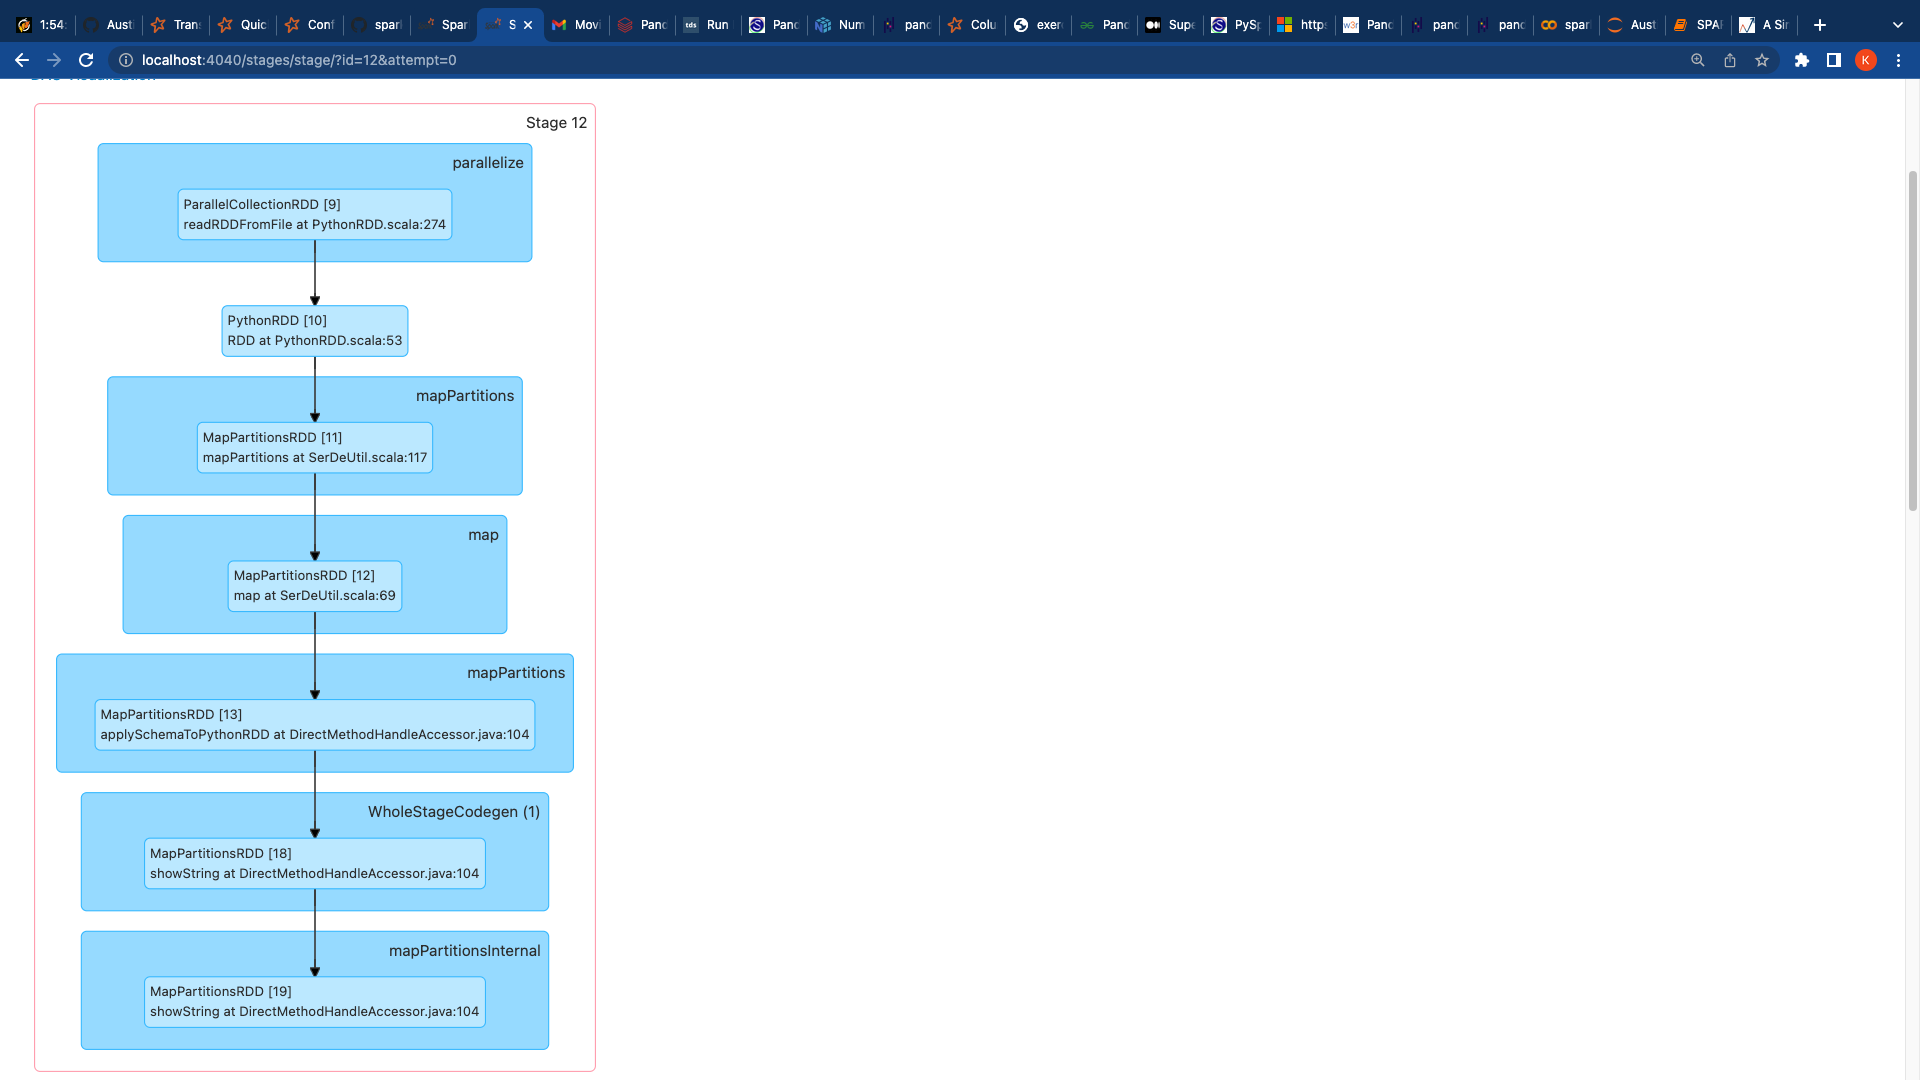

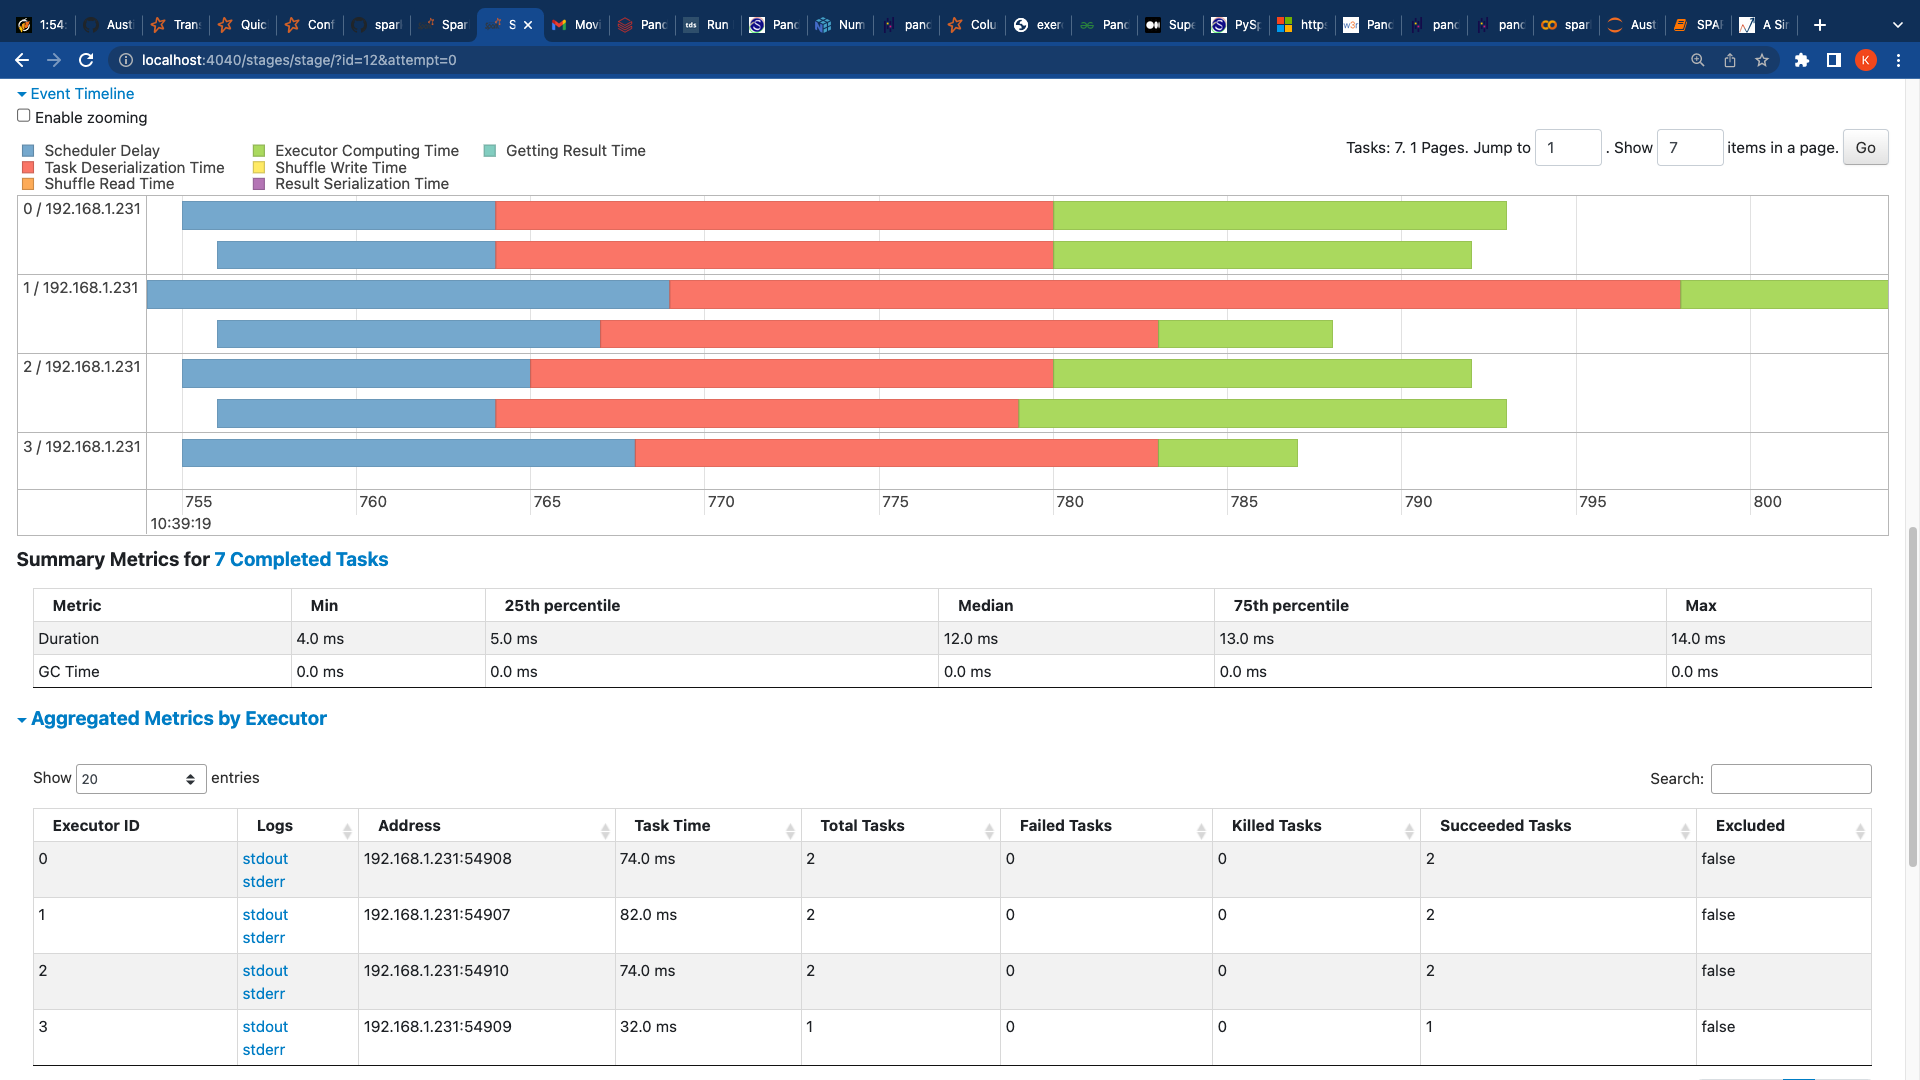

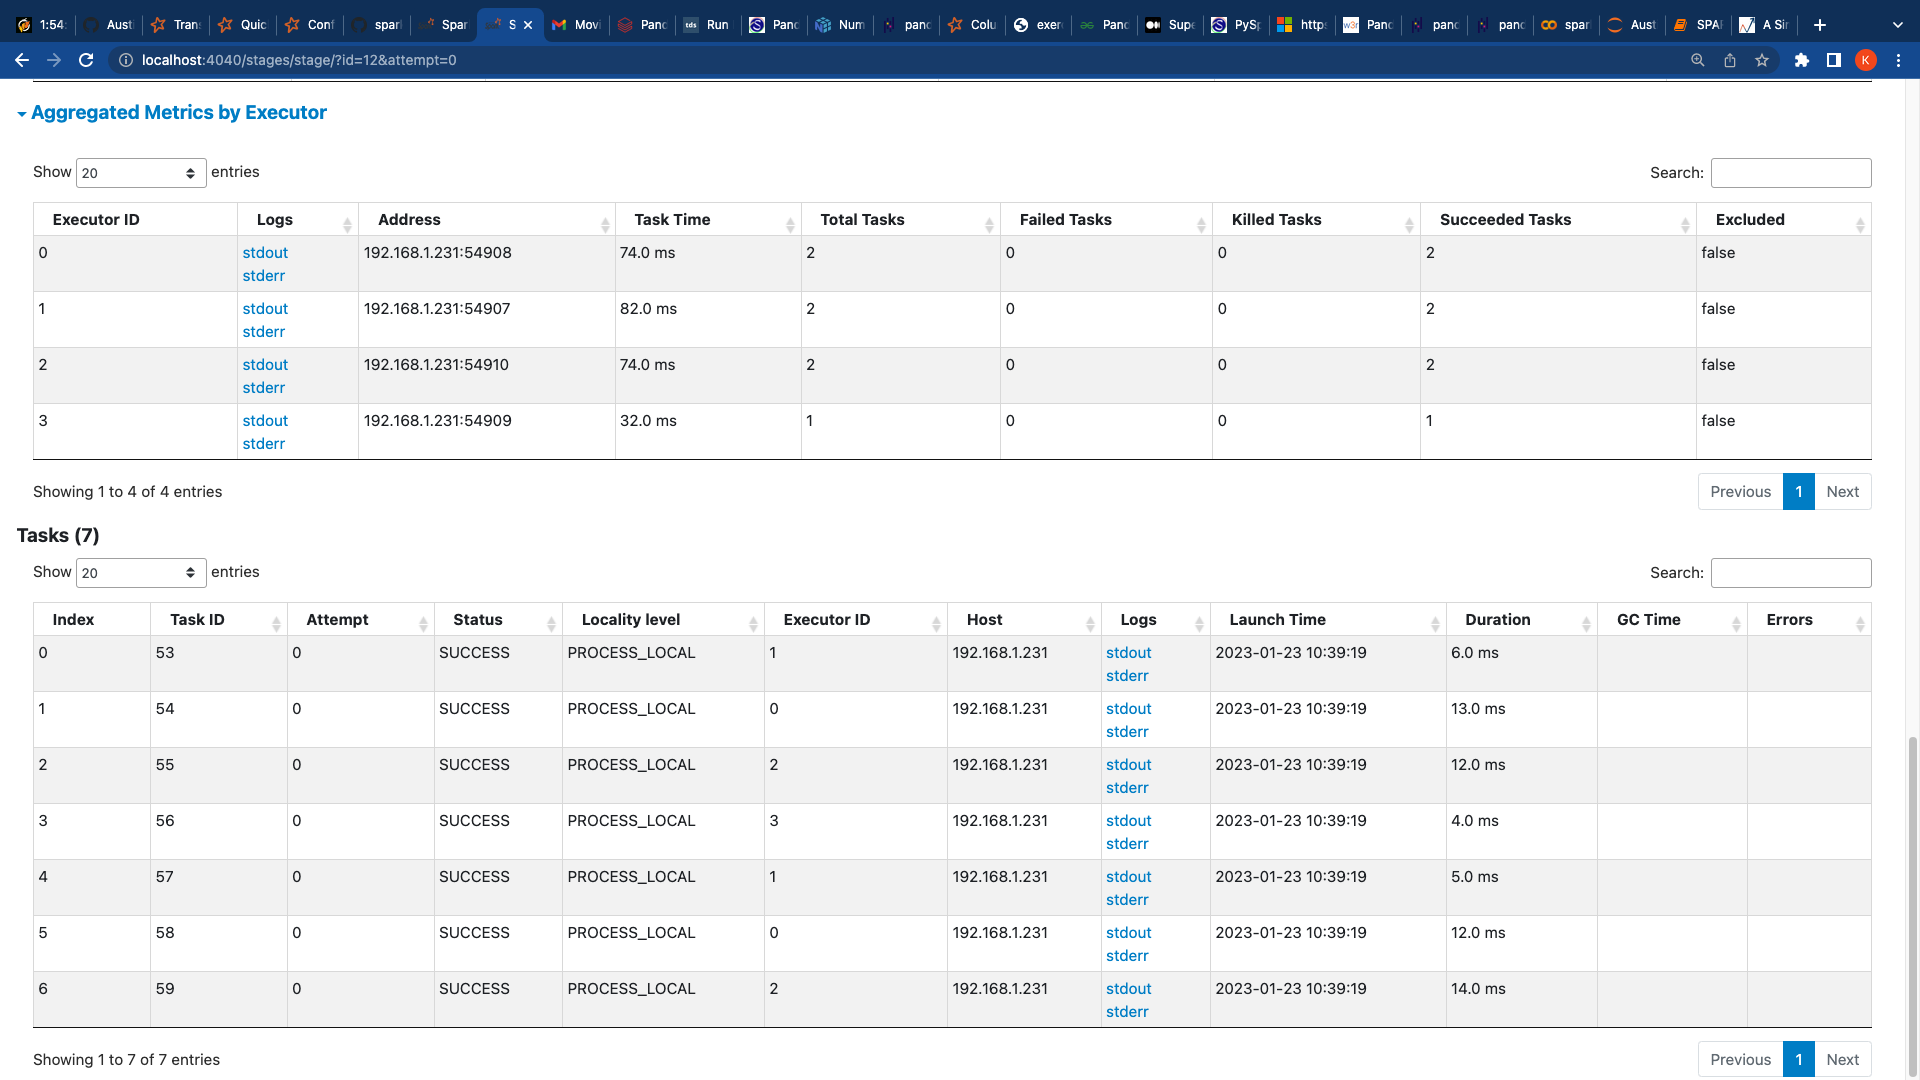

In [20]:
Df.apply(to_upper_str_columns,axis=1).apply(reduce_price,1000).apply(apply_discount).show()

AttributeError: 'DataFrame' object has no attribute 'apply'

In [24]:
psDF.apply(to_upper_str_columns)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `apply`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


KeyError: 'Courses'

##### Apply Datframe.transform to pandas api on spark

In [15]:
def to_upper_str_columns(Df):
    Df['Courses']=Df['Courses'].str.upper()
    return Df
 
#psDF.transform(to_upper_str_columns)

In [16]:
def reduce_price(df,reduceBy):
    df["New_fee"]=df["Fee"]-reduceBy
    return df
reduce_price(psDF,1000)

Courses    Fee Duration  Discount  New_fee
0    Spark  22000   30days    1000.0    21000
1  PySpark  25000   50days    2300.0    24000
2   Hadoop  23000   55days    1000.0    22000
3   Python  24000   40days    1200.0    23000
4   Pandas  26000   60days    2500.0    25000
5   Hadoop  25000   35days       NaN    24000
6    Spark  25000   30days    1400.0    24000
7   Python  22000   50days    1600.0    21000
8       NA   1500   40days       0.0      500

In [17]:
#New reduced fee by 1000
def reduce_price(df):
    df["New_fee"]=df["Fee"]-1000
    return df
df2=psDF.transform(reduce_price)
df2

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Courses    Fee Duration  Discount  New_fee
0    Spark  22000   30days    1000.0    21000
1  PySpark  25000   50days    2300.0    24000
2   Hadoop  23000   55days    1000.0    22000
3   Python  24000   40days    1200.0    23000
4   Pandas  26000   60days    2500.0    25000
5   Hadoop  25000   35days       NaN    24000
6    Spark  25000   30days    1400.0    24000
7   Python  22000   50days    1600.0    21000
8       NA   1500   40days       0.0      500

In [18]:
def apply_discount(df):
    df["Discounted_fee"]=df["New_fee"]-df['Discount']
    return df
df2.transform(apply_discount)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Courses    Fee Duration  Discount  New_fee  Discounted_fee
0    Spark  22000   30days    1000.0    21000         20000.0
1  PySpark  25000   50days    2300.0    24000         21700.0
2   Hadoop  23000   55days    1000.0    22000         21000.0
3   Python  24000   40days    1200.0    23000         21800.0
4   Pandas  26000   60days    2500.0    25000         22500.0
5   Hadoop  25000   35days       NaN    24000             NaN
6    Spark  25000   30days    1400.0    24000         22600.0
7   Python  22000   50days    1600.0    21000         19400.0
8       NA   1500   40days       0.0      500           500.0

In [39]:
to_upper_str_columns(psDF)

0      SPARK
1    PYSPARK
2     HADOOP
3     PYTHON
4     PANDAS
5     HADOOP
6      SPARK
7     PYTHON
8         NA
Name: Courses, dtype: object

In [19]:
psDF.transform(to_upper_str_columns).transform(reduce_price).transform(apply_discount)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)
/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Courses    Fee Duration  Discount  New_fee  Discounted_fee
0    SPARK  22000   30days    1000.0    21000         20000.0
1  PYSPARK  25000   50days    2300.0    24000         21700.0
2   HADOOP  23000   55days    1000.0    22000         21000.0
3   PYTHON  24000   40days    1200.0    23000         21800.0
4   PANDAS  26000   60days    2500.0    25000         22500.0
5   HADOOP  25000   35days       NaN    24000             NaN
6    SPARK  25000   30days    1400.0    24000         22600.0
7   PYTHON  22000   50days    1600.0    21000         19400.0
8       NA   1500   40days       0.0      500           500.0

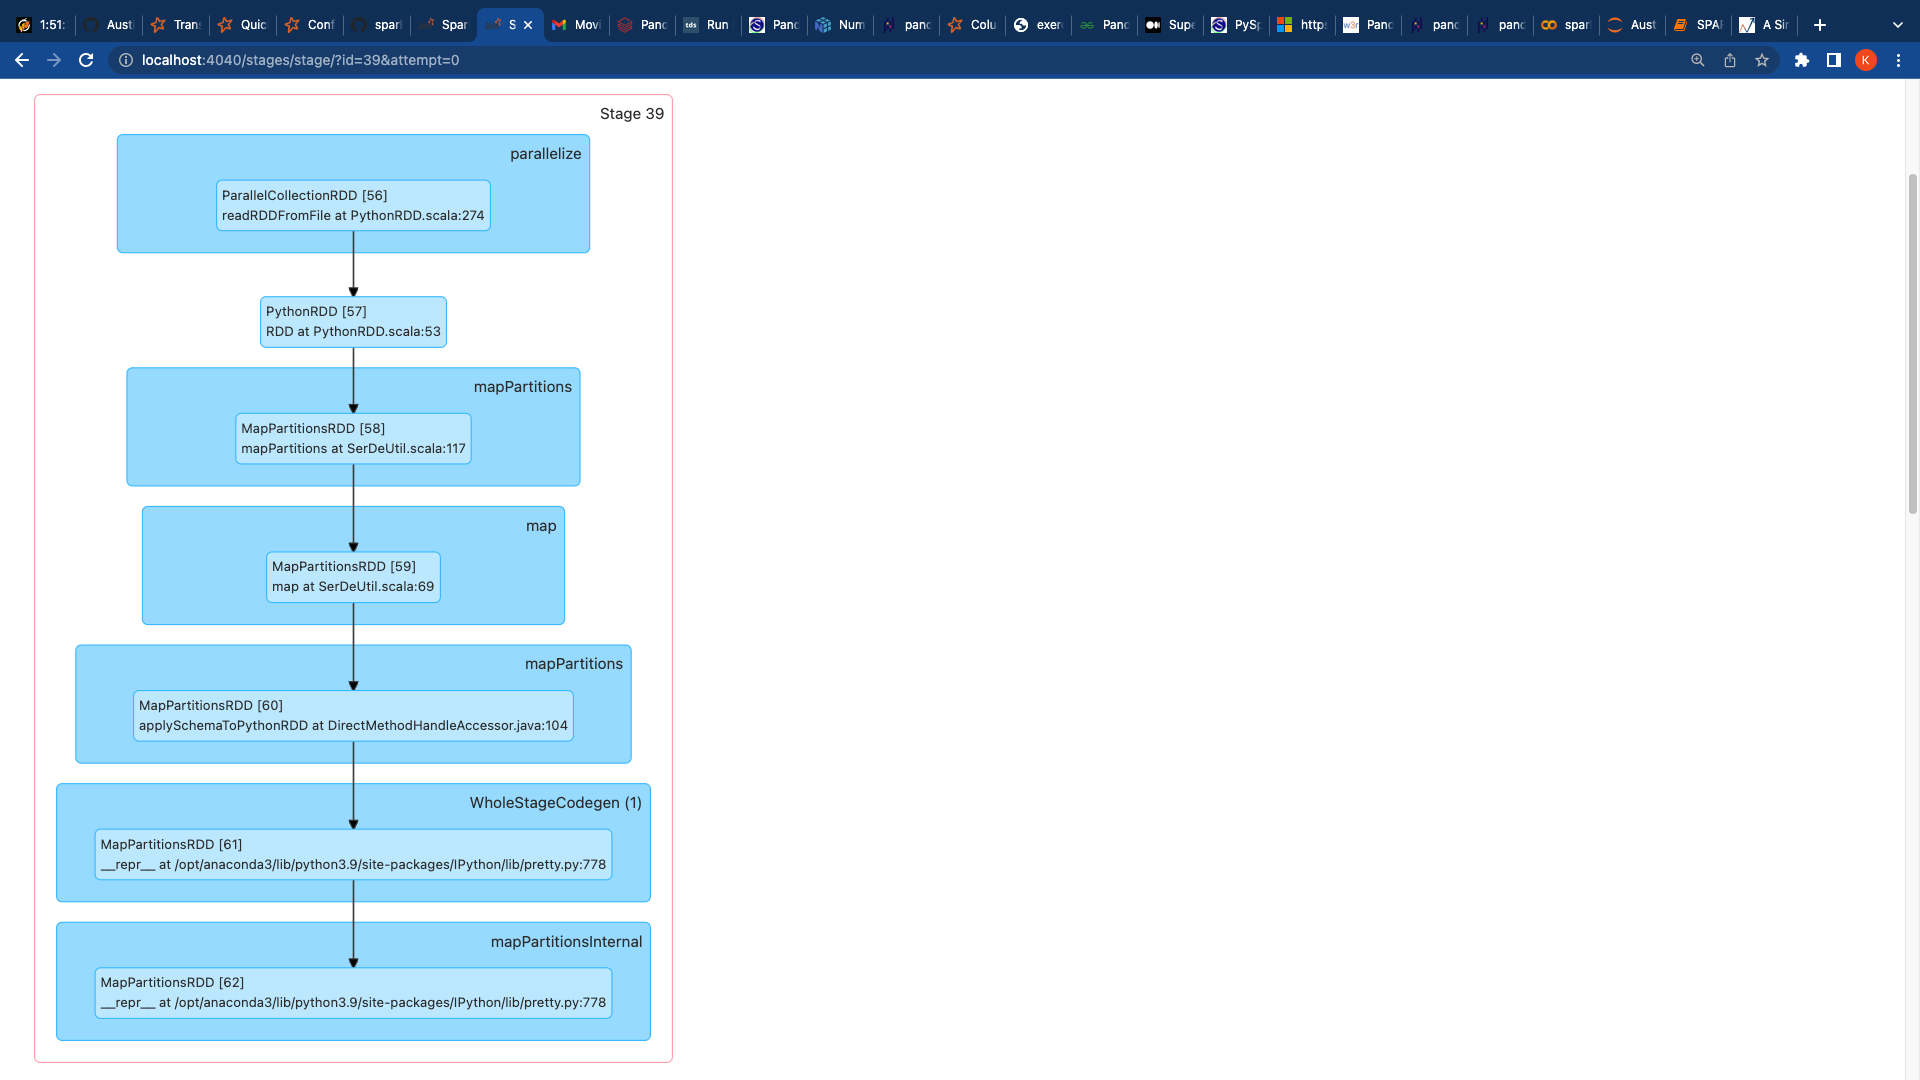

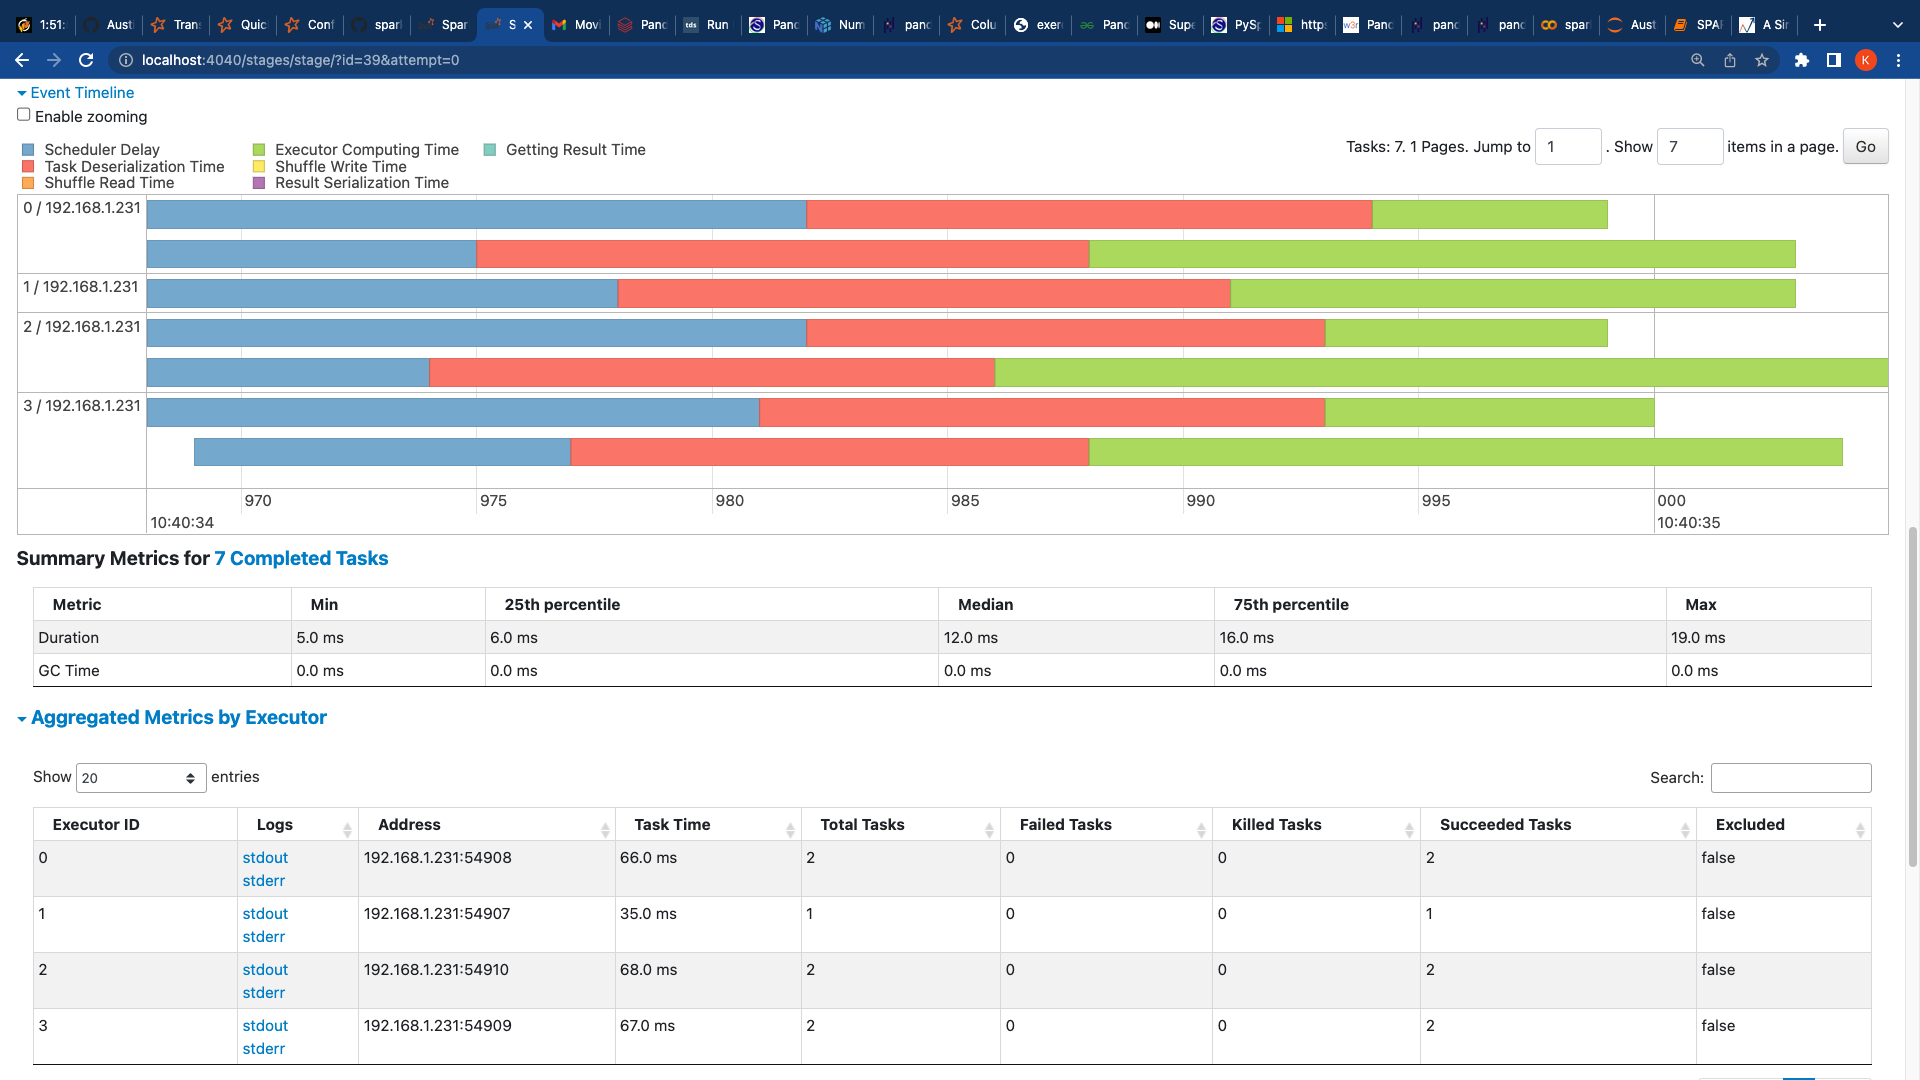

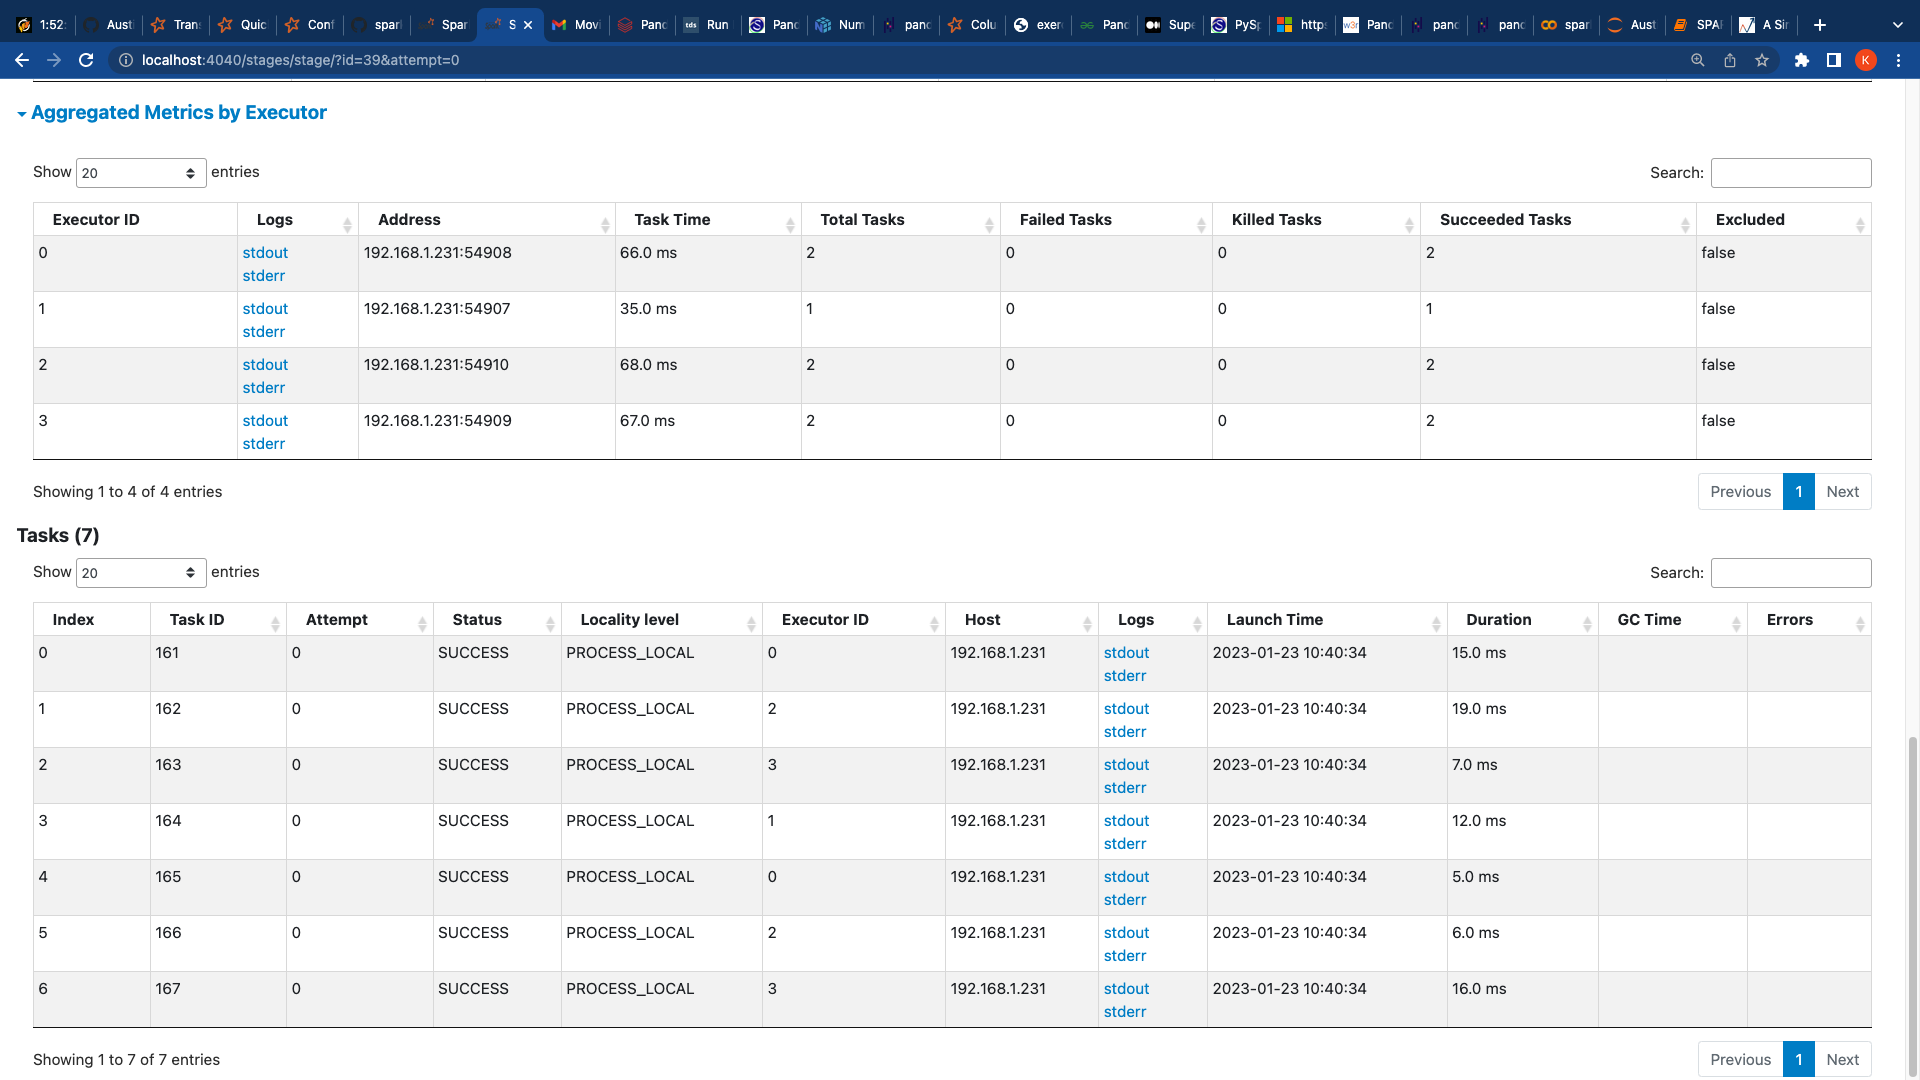

In [32]:
df = pd.DataFrame({'A': [1,2,3], 'B': [10,20,30] })
psdf=ps.DataFrame(df)

In [26]:
#String function
df.transform('sqrt')

A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226

In [37]:
df.apply('sqrt')

A         B
0  1.000000  3.162278
1  1.414214  4.472136
2  1.732051  5.477226

In [28]:
df['A'].transform('sqrt')

0    1.000000
1    1.414214
2    1.732051
Name: A, dtype: float64

In [29]:
df['A'].apply('sqrt')

0    1.000000
1    1.414214
2    1.732051
Name: A, dtype: float64

In [30]:
# A list of functions
df.transform([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

In [31]:
# A list of functions
df.apply([np.sqrt, np.exp])

A                    B              
       sqrt        exp      sqrt           exp
0  1.000000   2.718282  3.162278  2.202647e+04
1  1.414214   7.389056  4.472136  4.851652e+08
2  1.732051  20.085537  5.477226  1.068647e+13

### pandas_on_spark.transform_batch and pandas_on_spark.apply_batch:

- In DataFrame.pandas_on_spark.transform_batch(), DataFrame.pandas_on_spark.apply_batch(), Series.pandas_on_spark.transform_batch(), etc., the **batch** postfix means each chunk in pandas-on-Spark DataFrame or Series. 
- The APIs slice the pandas-on-Spark DataFrame or Series, and then apply the given function with pandas DataFrame or Series as input and output. 

In [42]:
psdf = ps.DataFrame({'a': [1,2,3], 'b':[4,5,6]})
def pandas_plus(pdf):
     return pdf + 1 

In [43]:
psdf.pandas_on_spark.transform_batch(pandas_plus)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `transform_batch`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


a  b
0  2  5
1  3  6
2  4  7

In [44]:
psdf.pandas_on_spark.apply_batch(pandas_plus)

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: If the type hints is not specified for `apply_batch`, it is expensive to infer the data type internally.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


a  b
0  2  5
1  3  6
2  4  7

- The functions in both examples take a pandas DataFrame as a chunk of pandas-on-Spark DataFrame, and output a pandas DataFrame. Pandas API on Spark combines the pandas DataFrames as a pandas-on-Spark DataFrame.
- Note that DataFrame.pandas_on_spark.transform_batch() has the length restriction - the length of input and output should be the same - whereas DataFrame.pandas_on_spark.apply_batch() does not. However, it is important to know that the output belongs to the same DataFrame when DataFrame.pandas_on_spark.transform_batch() returns a Series, and you can avoid a shuffle by the operations between different DataFrames. 

#### Type Support in Pandas API on Spark: 
- How data types change when converting pandas-on-Spark DataFrame from/to PySpark DataFrame or pandas DataFrame?
- Type casting between PySpark and pandas API on Spark
  - Automatically casted to the appropriate type
- Type casting between pandas and pandas API on Spark
  - Data types are basically same as pandas.
- pyspark.pandas.DataFrame.astype is used to cast from data type to another.
  - example: df.atype('int8')
  - df.astype({'a': float})
- However, there are several data types only provided by pandas.
  - Implemented in future
    - pd.Timedelta
    - pd.Categorical
    - pd.CategoricalDtype
  - Not yet planned to implement in future
    - pd.SparseDtype
    - pd.DatetimeTZDtype
    - pd.UInt*Dtype
    - pd.BooleanDtype
    - pd.StringDtype



In [7]:

data = [("Spark",22000,"30days",1000),
        ("PySpark",25000,"45days",1500),
        ("Hadoop",23000,'55days',1000),
        ("Spark",26000,"50days",500),
        ("Python",23000,'35days',None)]

schema=['Courses','Fee','Duration','Discount']
sdf=spark.createDataFrame(data=data,schema=schema)

In [8]:
sdf.printSchema()

root
 |-- Courses: string (nullable = true)
 |-- Fee: long (nullable = true)
 |-- Duration: string (nullable = true)
 |-- Discount: long (nullable = true)



In [11]:
# Convert Pyspark- pandasApi on spark
psdf=sdf.pandas_api()
psdf.dtypes

Courses     object
Fee          int64
Duration    object
Discount     int64
dtype: object

In [12]:
#Covert pandas-api on spark to pandas
# When converting pandas-on-Spark DataFrame to pandas DataFrame, and the data types are basically same as pandas.
pdf=psdf.to_pandas()
pdf.dtypes

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


Courses      object
Fee           int64
Duration     object
Discount    float64
dtype: object

In [20]:
#Casting pandas Api on spark to string type
pcsdf=psdf.astype('string')
pcsdf.dtypes

Courses     string
Fee         string
Duration    string
Discount    string
dtype: object

In [19]:
psdf.dtypes

Courses     object
Fee          int64
Duration    object
Discount     int64
dtype: object

In [23]:
#casting particular column 
pcdf=psdf.astype({'Fee':'float'})
pcdf.dtypes

Courses      object
Fee         float64
Duration     object
Discount      int64
dtype: object

In [24]:
#pandas categorical datatype(not yet implemented under spark)
ps.Series([pd.Categorical([1, 2, 3])])

ArrowInvalid: Could not convert [1, 2, 3]
Categories (3, int64): [1, 2, 3] with type Categorical: did not recognize Python value type when inferring an Arrow data type

- You can check internal mapping by using as_spark_type function.

In [25]:
import typing
import numpy as np
from pyspark.pandas.typedef import as_spark_type
as_spark_type(int)

LongType()

In [26]:
as_spark_type(np.int32)

IntegerType()

In [27]:
as_spark_type(typing.List[float])

ArrayType(DoubleType(), True)

#### Type Hints in Pandas API on Spark
- Pandas API on Spark, by default, infers the schema by taking some top records from the output
- It is expensive 
- pandas API on Spark will end up with executing the Spark job twice 
- Type hint avoids this problem
- Type Hinting with Names: 
- Type hinting with Index
- Examples of type hint:

In [30]:
#example of type hint with name
def pandas_div(pdf) -> ps.DataFrame[float, float]:
   # pdf is a pandas DataFrame.
    return pdf[['B', 'C']] / pdf[['B', 'C']]

In [31]:
df = ps.DataFrame({'A': ['a', 'a', 'b'], 'B': [1, 2, 3], 'C': [4, 6, 5]})

In [32]:
df.groupby('A').apply(pandas_div)

c0   c1
0  1.0  1.0
1  1.0  1.0
2  1.0  1.0

In [33]:
#pandas Series can be also used as a type hints:
def sqrt(x) -> pd.Series[float]:
     return np.sqrt(x)

In [35]:
df = ps.DataFrame([[4, 9]] * 3, columns=['A', 'B'])
df

A  B
0  4  9
1  4  9
2  4  9

In [36]:
df.apply(sqrt, axis=0)

A    B
0  2.0  3.0
1  2.0  3.0
2  2.0  3.0

In [42]:
#Example of type hinting with index
pdf = pd.DataFrame({'id': range(5)})
sample = pdf.copy()
sample["a"] = sample.id + 1

In [43]:
def transform(pdf) -> pd.DataFrame[
       sample.index.dtype, sample.dtypes]:
    pdf["a"] = pdf.id + 1
    return pdf
ps.from_pandas(pdf).pandas_on_spark.apply_batch(transform)

c0  c1
0   0   1
1   1   2
2   2   3
3   3   4
4   4   5

In [44]:
#Example of type hinting with multiindex
midx = pd.MultiIndex.from_arrays(
    [(1, 1, 2), (1.5, 4.5, 7.5)],
    names=("int", "float"))
pdf = pd.DataFrame(range(3), index=midx, columns=["id"])
sample = pdf.copy()
sample["a"] = sample.id + 1

In [47]:
def transform(pdf) -> pd.DataFrame[[int, float], [int, int]]:
    pdf["a"] = pdf.id + 1
    return pdf
ps.from_pandas(pdf).pandas_on_spark.apply_batch(transform)

c0  c1
1 1.5   0   1
  4.5   1   2
2 7.5   2   3

#### Grouping:[grouping](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/groupby.html)
- Grouping involves folling steps:
  - Splitting the data into groups based on some criteria
  - Applying a function to each group independently
  - Combining the results into a data structure

In [48]:
psdf = ps.DataFrame({'A': ['foo', 'bar', 'foo', 'bar',
                          'foo', 'bar', 'foo', 'foo'],
                    'B': ['one', 'one', 'two', 'three',
                          'two', 'two', 'one', 'three'],
                    'C': np.random.randn(8),
                    'D': np.random.randn(8)})

In [55]:
psdf

A      B         C         D
0  foo    one  0.746968  0.703066
1  bar    one  0.252810 -0.548724
2  foo    two  2.136618 -0.289346
3  bar  three  1.257750  0.000179
4  foo    two -0.688160  1.532311
5  bar    two  0.523636  0.744335
6  foo    one  0.948404 -0.196495
7  foo  three -0.922806  0.702179

In [54]:
psdf.groupby('A').sum()

C         D
A                      
foo  2.221024  2.451714
bar  2.034196  0.195790

In [56]:
psdf.groupby(['A', 'B']).sum()

C         D
A   B                        
foo one    1.695373  0.506571
bar three  1.257750  0.000179
foo two    1.448458  1.242965
    three -0.922806  0.702179
bar one    0.252810 -0.548724
    two    0.523636  0.744335

In [59]:
psdf.groupby('A').any()

B     C     D
A                     
foo  False  True  True
bar  False  True  True

In [61]:
psdf.groupby('B').any()

A     C     D
B                       
one    False  True  True
three  False  True  True
two    False  True  True

In [62]:
psdf.groupby('A').all()

B     C     D
A                    
foo  True  True  True
bar  True  True  True

In [75]:
psdf.groupby('A').filter(lambda x:x['C'].sum()<1)

Empty DataFrame
Columns: [A, B, C, D]
Index: []

#### Plotting:[plotting](https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/frame.html#plotting)
- Use the Pandas plot function to create a line chart
- 

In [77]:
pser = pd.Series(np.random.randn(1000),
                 index=pd.date_range('1/1/2000', periods=1000))
psser = ps.Series(pser)

In [78]:
psser = psser.cummax()

In [81]:
psser.plot()

23/01/24 11:26:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:26:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:26:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:26:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:26:50 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [80]:
!pip install plotly

     |████████████████████████████████| 15.2 MB 4.0 MB/s eta 0:00:01    |████▎                           | 2.0 MB 1.8 MB/s eta 0:00:08


In [82]:
pdf = pd.DataFrame(np.random.randn(1000, 4), index=pser.index,
                   columns=['A', 'B', 'C', 'D'])

In [83]:
psdf = ps.from_pandas(pdf)

In [84]:
psdf = psdf.cummax()

In [85]:
psdf.plot()

23/01/24 11:28:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:28:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:28:23 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:28:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.
23/01/24 11:28:24 WARN WindowExec: No Partition Defined for Window operation! Moving all data to a single partition, this can cause serious performance degradation.


In [86]:
df = ps.DataFrame({'mass': [0.330, 4.87, 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])

In [87]:
df.mass.plot.pie() 

In [92]:
df = ps.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
df.plot.scatter(x='length', y='width')  

In [93]:
df.plot.scatter(x='length', y='width').update_layout(template="plotly_dark")

In [94]:
df.plot.hist(bins=12, alpha=0.5) 

In [95]:
df = pd.DataFrame(
    np.random.randint(1, 7, 6000),
    columns=['one'])
df['two'] = df['one'] + np.random.randint(1, 7, 6000)
df = ps.from_pandas(df)
df.plot.hist(bins=12, alpha=0.5)  

In [96]:
#plot.density(bw_method=None, ind=None, **kwargs)¶Generate Kernel Density Estimate plot using Gaussian kernels
s = ps.Series([1, 2, 2.5, 3, 3.5, 4, 5])
s.plot.kde(bw_method=0.3)  

23/01/24 11:41:38 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/01/24 11:41:38 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
23/01/24 11:41:38 WARN InstanceBuilder$JavaBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.VectorBLAS


In [97]:
s.plot.kde(bw_method=3)  

In [98]:
df = ps.DataFrame({
    'x': [1, 2, 2.5, 3, 3.5, 4, 5],
    'y': [4, 4, 4.5, 5, 5.5, 6, 6],
})
df.plot.kde(bw_method=0.3)  

In [99]:
df.plot.kde(bw_method=3)

In [100]:
df.plot.line()

In [103]:
df.plot.area()

#### Getting data in/out:

#### Exercise 1: Differentiate between pandas Api,pandas Api on Spark and pyspark Api
In this exercise, you will learn :

- First, run ordinary Python code with pandas dataframe, and see that it runs only on driver (master) and not distributed on Spark executors.
- Next, run the same code with PySpark and Spark Dataframe, and see that it runs as worker jobs on executors in distributed manners.
- Finally, introduce new pyspark.pandas (formerly, Koalas), in which you can use familiar pandas syntax with Spark scaling manners.

In [ ]:
###### prepare data
import numpy as np
np.random.seed(0)
x = np.arange(-10, 11)
y = 2*x + 1 + np.random.normal()
l = list(zip(x, y))
l

In [ ]:
##### create pandas dataframe
import pandas as pd
df = pd.DataFrame(l, columns=["x","y"])
df

In [ ]:
#creating pandas df on spark
psdf=ps.DataFrame(df)
psdf

In [ ]:
# pandas DataFrame can be a pandas-on-Spark DataFrame 
ps.from_pandas(df)

In [39]:
#
psdf.to_pandas()

/opt/anaconda3/lib/python3.9/site-packages/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning: `to_pandas` loads all data into the driver's memory. It should only be used if the resulting pandas DataFrame is expected to be small.
  warnings.warn(message, PandasAPIOnSparkAdviceWarning)


A   B
0  1  10
1  2  20
2  3  30

In [ ]:
#creating spark dataframe from pandas df
spark_df=spark.createDataFrame(df)
spark_df.show()

In [ ]:
psdf = ps.DataFrame({'id': range(10)})
psdf

In [ ]:
psdf.rank()

In [ ]:
psdf.rank().spark.explain()

In [ ]:
psdf.groupby("id").rank()

##### Exercise 2: Missing Data and Operations

##### Exercise 3: Options and settings

#### Exercise 4:Transform and apply:

### References:
- https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_ps.html
- https://docs.databricks.com/pandas/pandas-on-spark.html
- https://sparkbyexamples.com/pyspark/pandas-api-on-apache-spark-pyspark/

In [ ]:
s = pd.Series(range(5))
s.rolling(window=2).sum()

In [ ]:
s

In [ ]:
for window in s.rolling(window=2):
    print(window)

In [ ]:
s.rolling(window=2).count()